In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Activation, Flatten, Embedding, SpatialDropout1D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
# Turn off scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [9]:
RANDOM_SEED =4299
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [10]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [11]:
len(train_data)
len(test_data)

102

In [12]:
train_targets[:4]

array([15.2, 42.3, 50. , 21.1])

In [13]:
train_data[:5]

array([[  1.2325,   0.    ,   8.14  ,   0.    ,   0.538 ,   6.142 ,
         91.7   ,   3.9769,   4.    , 307.    ,  21.    , 396.9   ,
         18.72  ],
       [  0.0218,  82.5   ,   2.03  ,   0.    ,   0.415 ,   7.61  ,
         15.7   ,   6.27  ,   2.    , 348.    ,  14.7   , 395.38  ,
          3.11  ],
       [  4.8982,   0.    ,  18.1   ,   0.    ,   0.631 ,   4.97  ,
        100.    ,   1.3325,  24.    , 666.    ,  20.2   , 375.52  ,
          3.26  ],
       [  0.0396,   0.    ,   5.19  ,   0.    ,   0.515 ,   6.037 ,
         34.5   ,   5.9853,   5.    , 224.    ,  20.2   , 396.9   ,
          8.01  ],
       [  3.6931,   0.    ,  18.1   ,   0.    ,   0.713 ,   6.376 ,
         88.4   ,   2.5671,  24.    , 666.    ,  20.2   , 391.43  ,
         14.65  ]])

## Preprocessing Data

In [14]:
## We will Normalize the data

# mean = train_data.mean(axis=0)
# std_dev = train_data.std(axis=0)

# train_data -= mean
# train_data /= std_dev


# # We're normalizing the test data with training data's mean & std dev
# test_data -= mean
# test_data /= std_dev

In [15]:
scaler = StandardScaler()
scaler.fit(train_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
def preprocess(scaler, data):
    return scaler.transform(data)

In [17]:
preprocess(scaler, train_data)
preprocess(scaler, test_data)

array([[ 1.5537, -0.4836,  1.0283, ...,  0.7845, -3.4846,  2.2509],
       [-0.3924, -0.4836, -0.1609, ..., -0.3076,  0.4273,  0.4788],
       [-0.3998, -0.4836, -0.8694, ...,  0.7845,  0.4481, -0.4142],
       ...,
       [-0.2071, -0.4836,  1.2459, ..., -1.7182,  0.3705, -1.4934],
       [-0.367 , -0.4836, -0.7209, ..., -0.4896,  0.3928, -0.4183],
       [-0.089 , -0.4836,  1.2459, ..., -1.7182, -1.2195, -0.4045]])

### Model

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets, random_state=4299, test_size=0.2)

In [19]:
X_test = test_data
y_test = test_targets

In [20]:
X_train.shape

(323, 13)

In [21]:
INPUT_SHAPE = X_train.shape[1]

In [22]:
def create_model():
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Dense, Dropout 
    
    inputs = Input(shape=(INPUT_SHAPE, ), dtype='float32')
    x = Dense(64, activation='relu', kernel_regularizer =regularizers.l2(0.001))(inputs)
    x = Dense(64, activation='relu', kernel_regularizer =regularizers.l2(0.001))(x)
    #x = Dropout(0.5)(x)
    outputs = Dense(1)(x)
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

In [23]:
def model_compile(model):
    model.compile(loss='mse',optimizer='rmsprop', metrics=['mae'])

In [24]:
model = create_model()
model_compile(model)

In [25]:
model.fit(X_train, y_train,
          epochs=100,
          batch_size=32,
          validation_data=(X_valid, y_valid))

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 0s 1ms/sample - loss: 270.6050 - mae: 11.9336 - val_loss: 69.8512 - val_mae: 5.9585
Epoch 2/100
323/323 [==============================] - 0s 54us/sample - loss: 150.0033 - mae: 9.6042 - val_loss: 229.0904 - val_mae: 12.9021
Epoch 3/100
323/323 [==============================] - 0s 69us/sample - loss: 92.5548 - mae: 7.2738 - val_loss: 119.3505 - val_mae: 8.7564
Epoch 4/100
323/323 [==============================] - 0s 68us/sample - loss: 164.4598 - mae: 10.2133 - val_loss: 113.8684 - val_mae: 8.3937
Epoch 5/100
323/323 [==============================] - 0s 66us/sample - loss: 98.9217 - mae: 7.1002 - val_loss: 56.1601 - val_mae: 5.8901
Epoch 6/100
323/323 [==============================] - 0s 74us/sample - loss: 97.2618 - mae: 7.4536 - val_loss: 106.7321 - val_mae: 8.9393
Epoch 7/100
323/323 [==============================] - 0s 68us/sample - loss: 156.3247 - mae: 9.3745 - val_loss: 83.12

323/323 [==============================] - 0s 68us/sample - loss: 75.3046 - mae: 6.2514 - val_loss: 72.9660 - val_mae: 6.9578
Epoch 60/100
323/323 [==============================] - 0s 67us/sample - loss: 63.6705 - mae: 5.8861 - val_loss: 70.2509 - val_mae: 6.7446
Epoch 61/100
323/323 [==============================] - 0s 60us/sample - loss: 55.3284 - mae: 5.7008 - val_loss: 176.9842 - val_mae: 12.0778
Epoch 62/100
323/323 [==============================] - 0s 58us/sample - loss: 57.2874 - mae: 5.6576 - val_loss: 34.9565 - val_mae: 4.1962
Epoch 63/100
323/323 [==============================] - 0s 51us/sample - loss: 70.3776 - mae: 6.2754 - val_loss: 27.3038 - val_mae: 3.5506
Epoch 64/100
323/323 [==============================] - 0s 51us/sample - loss: 78.0765 - mae: 6.7583 - val_loss: 58.1309 - val_mae: 6.5431
Epoch 65/100
323/323 [==============================] - 0s 53us/sample - loss: 49.2864 - mae: 5.0902 - val_loss: 56.4237 - val_mae: 5.5707
Epoch 66/100
323/323 [================

## Implement Cross Validation

In [26]:
k_fold = 4
num_val_samples = len(train_data) // 4
num_epochs = 500
all_mae_histories = []

In [27]:
X_train = train_data
y_train = train_targets

In [28]:
### Kfold Cv'den once mutlaka data shuffle edilmelidir

In [29]:
for i in range(k_fold):
    print(f'[INFO] {i+1}. fold is being processed now')
    print(' ')
    X_valid = X_train[i * num_val_samples: (i+1) * num_val_samples]
    y_valid = y_train[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_X_train = np.concatenate([X_train[: i * num_val_samples], X_train[(i+1) * num_val_samples :]], axis=0)
    partial_y_train = np.concatenate([y_train[: i * num_val_samples], y_train[(i+1) * num_val_samples :]], axis=0)
    
    model = create_model()
    model_compile(model)
    history = model.fit(partial_X_train, partial_y_train,
             epochs=num_epochs, batch_size=1, verbose=1,
             validation_data = (X_valid, y_valid))
    #print(history.history.items())
    mae_history = history.history['val_mae']
    
    all_mae_histories.append(mae_history)
    print('-*-'*33)

[INFO] 1. fold is being processed now
 
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 1s 2ms/sample - loss: 144.9485 - mae: 8.7578 - val_loss: 98.1445 - val_mae: 6.9725
Epoch 2/500
303/303 [==============================] - 0s 1ms/sample - loss: 112.7810 - mae: 8.0093 - val_loss: 523.5203 - val_mae: 21.2040
Epoch 3/500
303/303 [==============================] - 0s 1ms/sample - loss: 103.4200 - mae: 7.4810 - val_loss: 51.6202 - val_mae: 5.6958
Epoch 4/500
303/303 [==============================] - 0s 1ms/sample - loss: 83.7531 - mae: 6.5675 - val_loss: 50.2106 - val_mae: 5.2474
Epoch 5/500
303/303 [==============================] - 0s 1ms/sample - loss: 72.5757 - mae: 6.2452 - val_loss: 62.2655 - val_mae: 5.4987
Epoch 6/500
303/303 [==============================] - 0s 1ms/sample - loss: 64.5024 - mae: 5.8446 - val_loss: 47.8959 - val_mae: 5.1736
Epoch 7/500
303/303 [==============================] - 0s 1ms/sample - loss: 58.7570 - 

Epoch 60/500
303/303 [==============================] - 0s 1ms/sample - loss: 18.6298 - mae: 3.1697 - val_loss: 11.5521 - val_mae: 2.6926
Epoch 61/500
303/303 [==============================] - 0s 1ms/sample - loss: 21.6099 - mae: 3.2569 - val_loss: 11.7958 - val_mae: 2.7290
Epoch 62/500
303/303 [==============================] - 0s 1ms/sample - loss: 19.3405 - mae: 3.0892 - val_loss: 15.7363 - val_mae: 3.2480
Epoch 63/500
303/303 [==============================] - 0s 1ms/sample - loss: 20.7389 - mae: 3.2070 - val_loss: 14.8946 - val_mae: 3.1467
Epoch 64/500
303/303 [==============================] - 0s 1ms/sample - loss: 20.9189 - mae: 3.2561 - val_loss: 12.6056 - val_mae: 2.9434
Epoch 65/500
303/303 [==============================] - 0s 1ms/sample - loss: 18.2650 - mae: 3.1733 - val_loss: 16.0103 - val_mae: 2.9447
Epoch 66/500
303/303 [==============================] - 0s 1ms/sample - loss: 20.1899 - mae: 3.2719 - val_loss: 12.9692 - val_mae: 2.7950
Epoch 67/500
303/303 [============

303/303 [==============================] - 0s 1ms/sample - loss: 17.2070 - mae: 2.9763 - val_loss: 11.1213 - val_mae: 2.6511
Epoch 120/500
303/303 [==============================] - 0s 1ms/sample - loss: 17.2202 - mae: 2.9333 - val_loss: 14.7004 - val_mae: 2.9319
Epoch 121/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.0542 - mae: 2.9042 - val_loss: 15.8771 - val_mae: 3.1154
Epoch 122/500
303/303 [==============================] - 0s 1ms/sample - loss: 17.6579 - mae: 2.9605 - val_loss: 12.0388 - val_mae: 2.7175
Epoch 123/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.7501 - mae: 2.9459 - val_loss: 12.4555 - val_mae: 2.7003
Epoch 124/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.2472 - mae: 2.9601 - val_loss: 16.5132 - val_mae: 3.0234
Epoch 125/500
303/303 [==============================] - 0s 1ms/sample - loss: 19.1204 - mae: 3.0656 - val_loss: 10.6189 - val_mae: 2.5872
Epoch 126/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 14.9773 - mae: 2.7356 - val_loss: 18.5851 - val_mae: 3.0293
Epoch 179/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.7387 - mae: 2.8077 - val_loss: 14.0042 - val_mae: 3.0270
Epoch 180/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.7213 - mae: 2.7897 - val_loss: 14.9808 - val_mae: 2.8471
Epoch 181/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.3575 - mae: 2.8517 - val_loss: 14.4128 - val_mae: 2.7681
Epoch 182/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.2307 - mae: 2.8091 - val_loss: 12.6489 - val_mae: 2.6266
Epoch 183/500
303/303 [==============================] - 0s 1ms/sample - loss: 18.2254 - mae: 2.8649 - val_loss: 21.4080 - val_mae: 3.2077
Epoch 184/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.0351 - mae: 2.8164 - val_loss: 19.5991 - val_mae: 3.5949
Epoch 185/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 16.4072 - mae: 2.8014 - val_loss: 15.9884 - val_mae: 2.9927
Epoch 238/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.2640 - mae: 2.6236 - val_loss: 19.8934 - val_mae: 3.2351
Epoch 239/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.0191 - mae: 2.7605 - val_loss: 13.2186 - val_mae: 2.8371
Epoch 240/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.0864 - mae: 2.6937 - val_loss: 19.3242 - val_mae: 3.1382
Epoch 241/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.6913 - mae: 2.6679 - val_loss: 16.4669 - val_mae: 3.2199
Epoch 242/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.7231 - mae: 2.6412 - val_loss: 24.7745 - val_mae: 3.6921
Epoch 243/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.4941 - mae: 2.7704 - val_loss: 14.1459 - val_mae: 3.0200
Epoch 244/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 11.9729 - mae: 2.5380 - val_loss: 50.1662 - val_mae: 5.1072
Epoch 297/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.3421 - mae: 2.6523 - val_loss: 12.9956 - val_mae: 2.6012
Epoch 298/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.1528 - mae: 2.5346 - val_loss: 13.5567 - val_mae: 2.7529
Epoch 299/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.5189 - mae: 2.6340 - val_loss: 13.4146 - val_mae: 2.6328
Epoch 300/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.2802 - mae: 2.5966 - val_loss: 11.3004 - val_mae: 2.6123
Epoch 301/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.4477 - mae: 2.6975 - val_loss: 11.0305 - val_mae: 2.4465
Epoch 302/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.6424 - mae: 2.6900 - val_loss: 14.2711 - val_mae: 2.7797
Epoch 303/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 12.2058 - mae: 2.5548 - val_loss: 12.1704 - val_mae: 2.6069
Epoch 356/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.3436 - mae: 2.6353 - val_loss: 21.9336 - val_mae: 3.2466
Epoch 357/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.8928 - mae: 2.6196 - val_loss: 16.3658 - val_mae: 3.2871
Epoch 358/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.2679 - mae: 2.5505 - val_loss: 12.0754 - val_mae: 2.6588
Epoch 359/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.9333 - mae: 2.4778 - val_loss: 13.4017 - val_mae: 2.9461
Epoch 360/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.7969 - mae: 2.5267 - val_loss: 38.7359 - val_mae: 4.7146
Epoch 361/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.6726 - mae: 2.6130 - val_loss: 15.0410 - val_mae: 2.7743
Epoch 362/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 13.6718 - mae: 2.5665 - val_loss: 10.8915 - val_mae: 2.4409
Epoch 415/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.8433 - mae: 2.6815 - val_loss: 11.3266 - val_mae: 2.5714
Epoch 416/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.6862 - mae: 2.5226 - val_loss: 11.8460 - val_mae: 2.5119
Epoch 417/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.8304 - mae: 2.4467 - val_loss: 9.9233 - val_mae: 2.3757
Epoch 418/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.9448 - mae: 2.5908 - val_loss: 16.4856 - val_mae: 2.9988
Epoch 419/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.0847 - mae: 2.5091 - val_loss: 11.2194 - val_mae: 2.5002
Epoch 420/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.6518 - mae: 2.5204 - val_loss: 11.7947 - val_mae: 2.5740
Epoch 421/500
303/303 [===================

303/303 [==============================] - 0s 1ms/sample - loss: 12.4069 - mae: 2.4498 - val_loss: 14.2220 - val_mae: 2.8486
Epoch 474/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.0178 - mae: 2.4467 - val_loss: 15.7594 - val_mae: 2.9347
Epoch 475/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.4269 - mae: 2.3798 - val_loss: 12.3746 - val_mae: 2.6443
Epoch 476/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.1757 - mae: 2.5228 - val_loss: 16.9853 - val_mae: 2.8750
Epoch 477/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.2649 - mae: 2.5177 - val_loss: 13.3485 - val_mae: 2.6563
Epoch 478/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.2172 - mae: 2.4713 - val_loss: 9.5091 - val_mae: 2.3630
Epoch 479/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.6473 - mae: 2.5321 - val_loss: 9.8262 - val_mae: 2.5630
Epoch 480/500
303/303 [====================

Epoch 31/500
303/303 [==============================] - 0s 1ms/sample - loss: 27.1051 - mae: 3.9888 - val_loss: 36.2517 - val_mae: 5.0064
Epoch 32/500
303/303 [==============================] - 0s 1ms/sample - loss: 26.2536 - mae: 3.7985 - val_loss: 24.9744 - val_mae: 3.8965
Epoch 33/500
303/303 [==============================] - 0s 1ms/sample - loss: 24.7039 - mae: 3.7004 - val_loss: 56.3513 - val_mae: 6.1130
Epoch 34/500
303/303 [==============================] - 0s 1ms/sample - loss: 25.8752 - mae: 3.7110 - val_loss: 23.9257 - val_mae: 3.8357
Epoch 35/500
303/303 [==============================] - 0s 1ms/sample - loss: 25.8479 - mae: 3.6801 - val_loss: 22.2343 - val_mae: 3.3469
Epoch 36/500
303/303 [==============================] - 0s 1ms/sample - loss: 25.7034 - mae: 3.5579 - val_loss: 21.5877 - val_mae: 3.3109
Epoch 37/500
303/303 [==============================] - 0s 1ms/sample - loss: 24.5735 - mae: 3.6424 - val_loss: 17.6363 - val_mae: 3.1728
Epoch 38/500
303/303 [============

303/303 [==============================] - 0s 1ms/sample - loss: 19.5111 - mae: 3.1146 - val_loss: 16.5241 - val_mae: 3.0492
Epoch 91/500
303/303 [==============================] - 0s 1ms/sample - loss: 21.0830 - mae: 3.1412 - val_loss: 15.3178 - val_mae: 2.9877
Epoch 92/500
303/303 [==============================] - 0s 1ms/sample - loss: 18.8872 - mae: 3.1419 - val_loss: 16.6298 - val_mae: 2.9794
Epoch 93/500
303/303 [==============================] - 0s 1ms/sample - loss: 21.4871 - mae: 3.2024 - val_loss: 22.8921 - val_mae: 3.6126
Epoch 94/500
303/303 [==============================] - 0s 1ms/sample - loss: 20.1934 - mae: 3.2822 - val_loss: 14.4974 - val_mae: 2.9366
Epoch 95/500
303/303 [==============================] - 0s 1ms/sample - loss: 19.3597 - mae: 3.2221 - val_loss: 20.7653 - val_mae: 3.1650
Epoch 96/500
303/303 [==============================] - 0s 1ms/sample - loss: 20.0374 - mae: 3.1589 - val_loss: 16.5507 - val_mae: 2.9124
Epoch 97/500
303/303 [=========================

303/303 [==============================] - 0s 1ms/sample - loss: 15.8099 - mae: 3.0297 - val_loss: 19.7534 - val_mae: 3.2950
Epoch 150/500
303/303 [==============================] - 0s 1ms/sample - loss: 18.5596 - mae: 3.0032 - val_loss: 16.9093 - val_mae: 2.9669
Epoch 151/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.4402 - mae: 2.8579 - val_loss: 17.7809 - val_mae: 3.1278
Epoch 152/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.9317 - mae: 2.8323 - val_loss: 19.2198 - val_mae: 3.0825
Epoch 153/500
303/303 [==============================] - 0s 1ms/sample - loss: 17.3059 - mae: 2.8189 - val_loss: 21.6536 - val_mae: 3.2373
Epoch 154/500
303/303 [==============================] - 0s 1ms/sample - loss: 18.2517 - mae: 2.8829 - val_loss: 13.7453 - val_mae: 2.8587
Epoch 155/500
303/303 [==============================] - 0s 1ms/sample - loss: 17.3743 - mae: 2.8915 - val_loss: 13.0651 - val_mae: 2.7726
Epoch 156/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 15.6369 - mae: 2.7806 - val_loss: 19.3646 - val_mae: 3.2850
Epoch 209/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.3852 - mae: 2.7741 - val_loss: 11.5965 - val_mae: 2.5808
Epoch 210/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.3889 - mae: 2.8890 - val_loss: 14.6851 - val_mae: 2.8638
Epoch 211/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.6985 - mae: 2.8395 - val_loss: 23.0825 - val_mae: 3.2680
Epoch 212/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.1956 - mae: 2.8883 - val_loss: 14.6656 - val_mae: 2.8739
Epoch 213/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.8853 - mae: 2.8691 - val_loss: 26.1585 - val_mae: 3.8691
Epoch 214/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.0886 - mae: 2.8183 - val_loss: 21.9489 - val_mae: 3.5521
Epoch 215/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 14.8314 - mae: 2.6385 - val_loss: 22.0535 - val_mae: 3.6615
Epoch 268/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.4803 - mae: 2.8783 - val_loss: 12.3811 - val_mae: 2.5970
Epoch 269/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.4824 - mae: 2.7395 - val_loss: 11.9000 - val_mae: 2.6180
Epoch 270/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.1441 - mae: 2.8089 - val_loss: 13.7134 - val_mae: 2.7796
Epoch 271/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.1794 - mae: 2.7507 - val_loss: 18.3629 - val_mae: 3.3911
Epoch 272/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.0991 - mae: 2.7812 - val_loss: 17.4351 - val_mae: 2.9710
Epoch 273/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.6582 - mae: 2.8016 - val_loss: 21.3318 - val_mae: 3.4063
Epoch 274/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 16.0167 - mae: 2.7077 - val_loss: 13.4074 - val_mae: 2.7969
Epoch 327/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.0269 - mae: 2.7120 - val_loss: 15.1869 - val_mae: 2.7944
Epoch 328/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.8865 - mae: 2.8049 - val_loss: 12.8017 - val_mae: 2.7412
Epoch 329/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.8409 - mae: 2.7429 - val_loss: 12.5837 - val_mae: 2.8024
Epoch 330/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.5041 - mae: 2.8012 - val_loss: 14.0426 - val_mae: 2.7706
Epoch 331/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.1464 - mae: 2.7632 - val_loss: 13.1405 - val_mae: 2.7362
Epoch 332/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.3606 - mae: 2.7352 - val_loss: 17.3556 - val_mae: 2.8077
Epoch 333/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 15.3878 - mae: 2.7265 - val_loss: 13.0365 - val_mae: 2.6439
Epoch 386/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.4854 - mae: 2.6726 - val_loss: 18.8578 - val_mae: 2.9745
Epoch 387/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.0360 - mae: 2.6403 - val_loss: 11.6101 - val_mae: 2.6241
Epoch 388/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.9308 - mae: 2.7404 - val_loss: 15.2178 - val_mae: 2.7659
Epoch 389/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.1607 - mae: 2.6958 - val_loss: 15.0034 - val_mae: 2.8464
Epoch 390/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.1111 - mae: 2.8064 - val_loss: 16.9941 - val_mae: 2.8598
Epoch 391/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.3827 - mae: 2.6994 - val_loss: 11.8865 - val_mae: 2.6674
Epoch 392/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 13.2920 - mae: 2.5306 - val_loss: 15.5475 - val_mae: 3.0976
Epoch 445/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.3888 - mae: 2.6682 - val_loss: 21.8709 - val_mae: 3.3031
Epoch 446/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.7247 - mae: 2.6681 - val_loss: 12.5045 - val_mae: 2.6681
Epoch 447/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.8004 - mae: 2.6615 - val_loss: 17.4845 - val_mae: 2.9879
Epoch 448/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.2944 - mae: 2.5119 - val_loss: 14.2194 - val_mae: 2.7448
Epoch 449/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.7233 - mae: 2.6466 - val_loss: 11.8720 - val_mae: 2.5831
Epoch 450/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.3439 - mae: 2.7376 - val_loss: 13.5950 - val_mae: 2.7236
Epoch 451/500
303/303 [==================

Epoch 2/500
303/303 [==============================] - 0s 1ms/sample - loss: 158.4389 - mae: 9.0547 - val_loss: 45.8247 - val_mae: 4.6905
Epoch 3/500
303/303 [==============================] - 0s 1ms/sample - loss: 145.5847 - mae: 9.0008 - val_loss: 66.9769 - val_mae: 6.0309
Epoch 4/500
303/303 [==============================] - 0s 1ms/sample - loss: 102.7760 - mae: 7.3425 - val_loss: 73.4440 - val_mae: 6.2535
Epoch 5/500
303/303 [==============================] - 0s 1ms/sample - loss: 78.8799 - mae: 6.5340 - val_loss: 36.1962 - val_mae: 3.9145
Epoch 6/500
303/303 [==============================] - 0s 1ms/sample - loss: 75.9251 - mae: 6.3698 - val_loss: 53.4279 - val_mae: 5.4672
Epoch 7/500
303/303 [==============================] - 0s 1ms/sample - loss: 72.3889 - mae: 6.0761 - val_loss: 40.7743 - val_mae: 5.0440
Epoch 8/500
303/303 [==============================] - 0s 1ms/sample - loss: 69.3559 - mae: 5.9080 - val_loss: 37.7038 - val_mae: 4.6850
Epoch 9/500
303/303 [=================

303/303 [==============================] - 0s 1ms/sample - loss: 20.8138 - mae: 3.1643 - val_loss: 18.1271 - val_mae: 3.1025
Epoch 62/500
303/303 [==============================] - 0s 1ms/sample - loss: 19.1566 - mae: 3.1253 - val_loss: 23.3250 - val_mae: 3.2091
Epoch 63/500
303/303 [==============================] - 0s 1ms/sample - loss: 17.7042 - mae: 3.0043 - val_loss: 18.7629 - val_mae: 3.0815
Epoch 64/500
303/303 [==============================] - 0s 1ms/sample - loss: 18.8503 - mae: 3.1431 - val_loss: 18.6143 - val_mae: 2.9418
Epoch 65/500
303/303 [==============================] - 0s 1ms/sample - loss: 17.3061 - mae: 2.9845 - val_loss: 22.7126 - val_mae: 3.3289
Epoch 66/500
303/303 [==============================] - 0s 1ms/sample - loss: 20.1358 - mae: 3.1526 - val_loss: 20.8235 - val_mae: 3.3084
Epoch 67/500
303/303 [==============================] - 0s 1ms/sample - loss: 18.5101 - mae: 3.0138 - val_loss: 47.4486 - val_mae: 5.1997
Epoch 68/500
303/303 [=========================

303/303 [==============================] - 0s 1ms/sample - loss: 17.3679 - mae: 2.9697 - val_loss: 17.8640 - val_mae: 3.0917
Epoch 121/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.8788 - mae: 2.7314 - val_loss: 24.5233 - val_mae: 3.5601
Epoch 122/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.6471 - mae: 2.8282 - val_loss: 19.1210 - val_mae: 3.2258
Epoch 123/500
303/303 [==============================] - 0s 1ms/sample - loss: 17.3841 - mae: 2.9161 - val_loss: 18.7353 - val_mae: 3.0395
Epoch 124/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.0831 - mae: 2.8224 - val_loss: 17.1986 - val_mae: 2.8932
Epoch 125/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.9144 - mae: 2.8026 - val_loss: 20.2964 - val_mae: 2.9169
Epoch 126/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.3018 - mae: 2.8556 - val_loss: 16.7032 - val_mae: 2.9074
Epoch 127/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 14.7174 - mae: 2.7003 - val_loss: 16.6351 - val_mae: 2.6793
Epoch 180/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.3155 - mae: 2.8532 - val_loss: 16.3911 - val_mae: 2.9123
Epoch 181/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.4402 - mae: 2.6274 - val_loss: 16.3936 - val_mae: 2.6515
Epoch 182/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.5002 - mae: 2.5998 - val_loss: 15.2944 - val_mae: 2.7394
Epoch 183/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.5900 - mae: 2.6737 - val_loss: 15.8083 - val_mae: 2.8001
Epoch 184/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.3573 - mae: 2.7976 - val_loss: 19.3030 - val_mae: 3.0492
Epoch 185/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.3075 - mae: 2.7862 - val_loss: 18.8802 - val_mae: 2.9899
Epoch 186/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 12.4824 - mae: 2.5588 - val_loss: 24.2629 - val_mae: 3.4815
Epoch 239/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.5505 - mae: 2.5208 - val_loss: 39.6176 - val_mae: 4.6026
Epoch 240/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.4071 - mae: 2.5323 - val_loss: 20.4455 - val_mae: 3.0893
Epoch 241/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.3001 - mae: 2.6632 - val_loss: 17.7215 - val_mae: 3.2095
Epoch 242/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.0062 - mae: 2.3666 - val_loss: 13.8250 - val_mae: 2.6318
Epoch 243/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.7576 - mae: 2.5797 - val_loss: 17.9165 - val_mae: 3.0430
Epoch 244/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.3664 - mae: 2.6851 - val_loss: 14.9533 - val_mae: 2.7259
Epoch 245/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 11.7911 - mae: 2.4478 - val_loss: 18.2828 - val_mae: 3.3222
Epoch 298/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.0173 - mae: 2.5235 - val_loss: 14.9733 - val_mae: 2.7538
Epoch 299/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.1271 - mae: 2.5735 - val_loss: 16.5515 - val_mae: 2.9153
Epoch 300/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.5375 - mae: 2.4542 - val_loss: 15.5209 - val_mae: 2.7414
Epoch 301/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.9532 - mae: 2.5149 - val_loss: 16.2685 - val_mae: 2.7058
Epoch 302/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.7982 - mae: 2.5005 - val_loss: 16.4565 - val_mae: 3.0234
Epoch 303/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.0547 - mae: 2.5006 - val_loss: 14.4023 - val_mae: 2.6089
Epoch 304/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 11.6056 - mae: 2.3422 - val_loss: 12.6774 - val_mae: 2.5973
Epoch 357/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.6713 - mae: 2.3845 - val_loss: 18.4250 - val_mae: 3.0631
Epoch 358/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.1214 - mae: 2.4347 - val_loss: 15.9917 - val_mae: 2.8313
Epoch 359/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.5254 - mae: 2.4988 - val_loss: 17.7748 - val_mae: 3.0209
Epoch 360/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.5064 - mae: 2.4579 - val_loss: 15.3527 - val_mae: 2.6703
Epoch 361/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.9783 - mae: 2.4674 - val_loss: 15.6850 - val_mae: 2.7723
Epoch 362/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.7475 - mae: 2.4388 - val_loss: 12.7603 - val_mae: 2.5533
Epoch 363/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 11.1810 - mae: 2.3180 - val_loss: 17.6649 - val_mae: 2.9712
Epoch 416/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.4620 - mae: 2.3576 - val_loss: 14.3399 - val_mae: 2.6263
Epoch 417/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.2483 - mae: 2.3946 - val_loss: 15.8888 - val_mae: 2.8466
Epoch 418/500
303/303 [==============================] - 0s 1ms/sample - loss: 9.7534 - mae: 2.2574 - val_loss: 21.9007 - val_mae: 3.1515
Epoch 419/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.8717 - mae: 2.3910 - val_loss: 19.0482 - val_mae: 3.3551
Epoch 420/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.3350 - mae: 2.3786 - val_loss: 16.4188 - val_mae: 2.7886
Epoch 421/500
303/303 [==============================] - 0s 1ms/sample - loss: 10.8214 - mae: 2.4507 - val_loss: 13.6432 - val_mae: 2.5594
Epoch 422/500
303/303 [===================

303/303 [==============================] - 0s 1ms/sample - loss: 11.0465 - mae: 2.3275 - val_loss: 16.2057 - val_mae: 2.9641
Epoch 475/500
303/303 [==============================] - 0s 1ms/sample - loss: 10.0437 - mae: 2.3067 - val_loss: 19.8699 - val_mae: 3.1710
Epoch 476/500
303/303 [==============================] - 0s 1ms/sample - loss: 9.9760 - mae: 2.2587 - val_loss: 14.0941 - val_mae: 2.7180
Epoch 477/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.0723 - mae: 2.2440 - val_loss: 20.5591 - val_mae: 3.1952
Epoch 478/500
303/303 [==============================] - 0s 1ms/sample - loss: 10.5433 - mae: 2.1955 - val_loss: 15.9473 - val_mae: 2.7680
Epoch 479/500
303/303 [==============================] - 0s 1ms/sample - loss: 10.9977 - mae: 2.3661 - val_loss: 20.1022 - val_mae: 3.1624
Epoch 480/500
303/303 [==============================] - 0s 1ms/sample - loss: 10.3837 - mae: 2.2723 - val_loss: 17.5326 - val_mae: 2.9992
Epoch 481/500
303/303 [===================

Epoch 32/500
303/303 [==============================] - 0s 1ms/sample - loss: 25.7971 - mae: 3.5862 - val_loss: 46.8219 - val_mae: 4.4025
Epoch 33/500
303/303 [==============================] - 0s 1ms/sample - loss: 26.5735 - mae: 3.6823 - val_loss: 49.7264 - val_mae: 5.6210
Epoch 34/500
303/303 [==============================] - 0s 1ms/sample - loss: 24.5694 - mae: 3.6695 - val_loss: 38.2699 - val_mae: 4.2472
Epoch 35/500
303/303 [==============================] - 0s 1ms/sample - loss: 24.6476 - mae: 3.6382 - val_loss: 45.2864 - val_mae: 4.3246
Epoch 36/500
303/303 [==============================] - 0s 1ms/sample - loss: 23.7481 - mae: 3.5634 - val_loss: 39.1361 - val_mae: 4.8421
Epoch 37/500
303/303 [==============================] - 0s 1ms/sample - loss: 24.5119 - mae: 3.4762 - val_loss: 39.4405 - val_mae: 4.1371
Epoch 38/500
303/303 [==============================] - 0s 1ms/sample - loss: 24.3808 - mae: 3.4931 - val_loss: 38.6385 - val_mae: 4.0581
Epoch 39/500
303/303 [============

303/303 [==============================] - 0s 1ms/sample - loss: 16.8305 - mae: 2.9056 - val_loss: 23.7069 - val_mae: 3.4609
Epoch 92/500
303/303 [==============================] - 0s 1ms/sample - loss: 17.0418 - mae: 2.8647 - val_loss: 26.2345 - val_mae: 3.6466
Epoch 93/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.4891 - mae: 2.9493 - val_loss: 27.4486 - val_mae: 3.5174
Epoch 94/500
303/303 [==============================] - 0s 1ms/sample - loss: 17.6221 - mae: 2.9678 - val_loss: 50.9399 - val_mae: 4.7461
Epoch 95/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.0214 - mae: 2.7682 - val_loss: 22.7345 - val_mae: 3.4058
Epoch 96/500
303/303 [==============================] - 0s 1ms/sample - loss: 17.5325 - mae: 2.7975 - val_loss: 21.3800 - val_mae: 3.3268
Epoch 97/500
303/303 [==============================] - 0s 1ms/sample - loss: 16.4606 - mae: 2.8255 - val_loss: 31.6827 - val_mae: 3.7815
Epoch 98/500
303/303 [=========================

303/303 [==============================] - 0s 1ms/sample - loss: 14.8804 - mae: 2.6756 - val_loss: 21.7229 - val_mae: 3.3581
Epoch 151/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.9148 - mae: 2.6840 - val_loss: 21.9015 - val_mae: 3.2257
Epoch 152/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.8082 - mae: 2.7884 - val_loss: 20.2927 - val_mae: 3.3674
Epoch 153/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.4595 - mae: 2.8224 - val_loss: 36.7851 - val_mae: 4.0023
Epoch 154/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.0589 - mae: 2.6528 - val_loss: 25.4485 - val_mae: 3.4963
Epoch 155/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.9888 - mae: 2.6517 - val_loss: 22.6661 - val_mae: 3.3264
Epoch 156/500
303/303 [==============================] - 0s 1ms/sample - loss: 15.0065 - mae: 2.6993 - val_loss: 21.6150 - val_mae: 3.3139
Epoch 157/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 13.5739 - mae: 2.5187 - val_loss: 19.7246 - val_mae: 3.1945
Epoch 210/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.3133 - mae: 2.7030 - val_loss: 26.9861 - val_mae: 3.5910
Epoch 211/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.5906 - mae: 2.6074 - val_loss: 26.9171 - val_mae: 3.8597
Epoch 212/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.1054 - mae: 2.6640 - val_loss: 27.3223 - val_mae: 3.7414
Epoch 213/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.3481 - mae: 2.6270 - val_loss: 41.8560 - val_mae: 4.2491
Epoch 214/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.2594 - mae: 2.6427 - val_loss: 30.7314 - val_mae: 4.3015
Epoch 215/500
303/303 [==============================] - 0s 1ms/sample - loss: 14.6879 - mae: 2.6805 - val_loss: 31.6568 - val_mae: 4.4434
Epoch 216/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 12.7388 - mae: 2.4937 - val_loss: 21.4122 - val_mae: 3.5628
Epoch 269/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.8050 - mae: 2.5957 - val_loss: 19.9043 - val_mae: 3.3362
Epoch 270/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.6167 - mae: 2.6621 - val_loss: 19.9186 - val_mae: 3.2992
Epoch 271/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.2106 - mae: 2.5244 - val_loss: 19.7573 - val_mae: 3.2597
Epoch 272/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.4247 - mae: 2.6156 - val_loss: 18.6279 - val_mae: 3.1343
Epoch 273/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.6247 - mae: 2.6388 - val_loss: 21.1144 - val_mae: 3.3225
Epoch 274/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.0077 - mae: 2.5569 - val_loss: 26.2489 - val_mae: 3.8570
Epoch 275/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 13.6869 - mae: 2.6385 - val_loss: 17.9478 - val_mae: 3.0897
Epoch 328/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.0680 - mae: 2.4372 - val_loss: 29.0376 - val_mae: 4.0802
Epoch 329/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.7946 - mae: 2.4991 - val_loss: 21.7005 - val_mae: 3.4816
Epoch 330/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.8914 - mae: 2.5171 - val_loss: 24.3558 - val_mae: 3.4877
Epoch 331/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.9535 - mae: 2.5829 - val_loss: 20.3077 - val_mae: 3.1433
Epoch 332/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.4445 - mae: 2.5116 - val_loss: 22.5471 - val_mae: 3.5941
Epoch 333/500
303/303 [==============================] - 0s 1ms/sample - loss: 13.1229 - mae: 2.5091 - val_loss: 20.3875 - val_mae: 3.2061
Epoch 334/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 13.2761 - mae: 2.4085 - val_loss: 19.9023 - val_mae: 3.3316
Epoch 387/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.2530 - mae: 2.4510 - val_loss: 20.4659 - val_mae: 3.5126
Epoch 388/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.9677 - mae: 2.5293 - val_loss: 19.9126 - val_mae: 3.3346
Epoch 389/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.0018 - mae: 2.4832 - val_loss: 18.5585 - val_mae: 3.2238
Epoch 390/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.4994 - mae: 2.3615 - val_loss: 20.0701 - val_mae: 3.2434
Epoch 391/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.9881 - mae: 2.4796 - val_loss: 20.7634 - val_mae: 3.2720
Epoch 392/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.6203 - mae: 2.5542 - val_loss: 16.1658 - val_mae: 2.9652
Epoch 393/500
303/303 [==================

303/303 [==============================] - 0s 1ms/sample - loss: 11.5506 - mae: 2.3380 - val_loss: 19.8989 - val_mae: 3.0536
Epoch 446/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.2809 - mae: 2.3687 - val_loss: 22.9427 - val_mae: 3.4110
Epoch 447/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.1908 - mae: 2.4330 - val_loss: 21.2413 - val_mae: 3.1928
Epoch 448/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.4870 - mae: 2.4289 - val_loss: 28.9196 - val_mae: 3.5592
Epoch 449/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.8769 - mae: 2.3150 - val_loss: 19.2489 - val_mae: 3.2579
Epoch 450/500
303/303 [==============================] - 0s 1ms/sample - loss: 11.1569 - mae: 2.3512 - val_loss: 19.1975 - val_mae: 3.4084
Epoch 451/500
303/303 [==============================] - 0s 1ms/sample - loss: 12.0318 - mae: 2.4772 - val_loss: 17.5693 - val_mae: 3.0224
Epoch 452/500
303/303 [==================

In [30]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print("[INFO] Mean of All Scores is :", average_mae_history)

[INFO] Mean of All Scores is : [9.905283, 13.92649, 6.762413, 5.7214384, 4.9194636, 6.041468, 5.338543, 5.0840693, 4.559663, 6.9059916, 5.1017113, 5.639104, 4.901004, 4.1514435, 4.391349, 5.463704, 5.279448, 4.309293, 4.0921326, 5.533814, 3.9587703, 4.2597227, 4.0682797, 3.9607487, 3.9493427, 4.378318, 3.9144719, 3.8667593, 4.2327003, 3.8207603, 5.0096703, 4.1975083, 5.2914276, 3.7521768, 3.564088, 3.7199697, 3.4467301, 3.4495416, 3.460876, 4.294277, 3.2902894, 3.45934, 3.4819322, 3.4731371, 3.4355338, 3.4998965, 4.540433, 3.6480598, 3.5834012, 3.5466857, 3.3017302, 3.5249062, 3.2620316, 3.3283896, 3.2338328, 3.3993225, 3.456556, 3.4617577, 3.615675, 3.1513162, 3.1500072, 3.4297915, 3.2213886, 3.0856135, 3.2706194, 3.3796163, 3.811211, 3.5321178, 3.48207, 3.415832, 3.5121918, 3.1096995, 3.6496181, 3.275623, 3.527563, 3.2842932, 3.5968518, 3.431849, 3.2874458, 3.0978072, 3.064115, 3.0142205, 3.1326134, 3.5638163, 3.1183088, 4.1130276, 3.3098302, 3.106614, 3.310069, 3.4657295, 3.0332778,

In [31]:
len(average_mae_history)

500

In [32]:
np.argmin(average_mae_history)

465

In [33]:
import matplotlib.pyplot as plt
plt.clf();
plt.figure(figsize=(12,8));
plt.plot(range(1, len(average_mae_history)+1), average_mae_history);
plt.xlabel('Epochs');
plt.ylabel('Validation MAE');
plt.grid(True);
plt.show();

<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 1 Axes>

In [34]:
# First 10 data points are in a different range so we can exclude those
# For the rest, we can replace each data point with an exponential moving average of the previous points 

<Figure size 432x288 with 0 Axes>

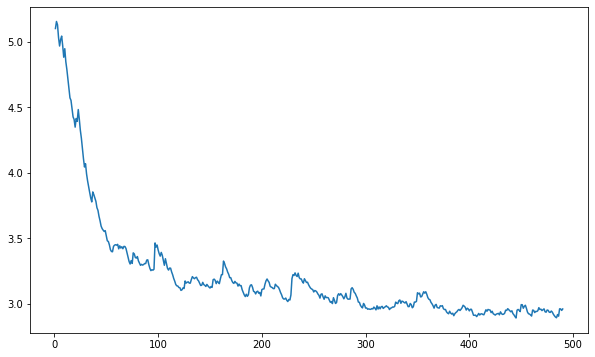

In [35]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point * (1- factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:]);
plt.clf();
plt.figure(figsize=(10,6));
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.show();

### Evaluating Model

In [36]:
y_pred = model.evaluate(X_test, y_test)

102/102 [==============================] - 0s 693us/sample - loss: 25.6634 - mae: 3.5099
